# Visibility graphs from spike trains
### Verónica Alejandra Cáceres$^1$, José Bargas $^1$ & Marco Arieli Herrera-Valdez$^{2}$
#### $^1$Instituto de Fisiología Celular & $^2$ Facultad de Ciencias, Universidad Nacional Autónoma de México

Created: 20151131 MAHV

**Description** 

Visibility graphs from the instantaneous firing rate of a bursting neron are constructed to explore a possible classification scheme for spike trains. The analysis is implemented in Python 3 (www.python.org). 

## Exploration: Visibility graph from a single spike train

Import the necessary modules. Many of the functions created to perform burst analyisis for these data sets are contained in the python module burstDetection.py

In [1]:
%matplotlib inline
from burstDetection import *

Open data files containing the spike times and preprocess the data to obtain instantaneous firing rates

In [2]:
dataDir='./trenesBursts/aleSpikeTimes/'
fName = "CntSt1.mat"
pigas = sc.squeeze(io.loadmat(dataDir + fName)["savevar"][0][0])
print("Found %d spikes"%(len(pigas)))
# Uncomment to check the data sets
# type(pigas)
# len(pigas)

Found 11820 spikes


Now obtain interspike intervals and instantáneous firing rates

In [3]:
isi = sc.zeros(len(pigas)); ifr = sc.zeros(len(pigas)) #Note time stamps are in milliseconds
isi[1:]= pigas[1:]-pigas[:-1]
ifr[1:]= 1/isi[1:]

Now plot the data to explore its contents

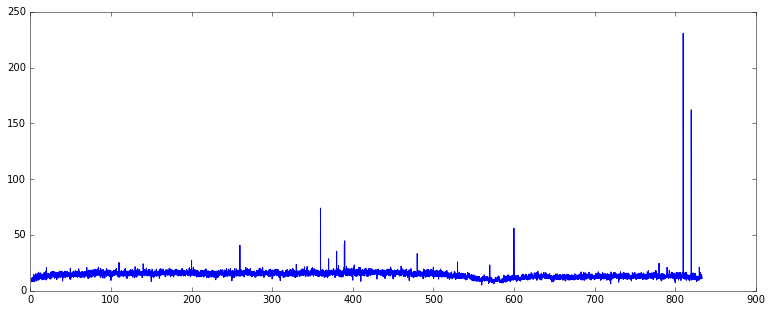

In [4]:
fig = gr.figure(figsize=(13,5))
gr.plot(pigas, ifr)

The functions with which the visibility graph will be constructed are

In [5]:
def slopeAB(A,B):
    """
    slopeAB calculates the slope between two points A and B
    Example:
    sAB=slopeAB(a,b)
    """
    mAB = (B[1]-A[1]) / (B[0]-A[0])
    return mAB


def calcFwdSlopes(x,y): 
    """
    calcFwdSlopes calculates the forward-slopes between pairs of points from graph {(x,y)}
    Example:
    s=calcFwdSlopes(x,y)
    """
    nY=len(y)
    s=list()
    for m in sc.arange(nY-1):
        A=[x[m], y[m]]
        s.append(list())
        for n in sc.arange(m+1,nY):
            B=[x[n], y[n]]
            s[m].append(slopeAB(A,B))
    return s 

def fwdVisibilityInds(x,y):
    """
    fwdVisibilityInds obtains the indices of the forward-visible neighbours within a graph {(x,y)}
    neighs=fwdVisibilityInds(x,y)
    """
    nodes=list()
    neighs=list()
    nY=len(y)
    s=calcFwdSlopes(x,y)
    #nodes = sc.arange(nY)
    for m in sc.arange(nY-2):
        a=[x[m], y[m]]
        b=[x[m+1], y[m+1]]
        sAB=slopeAB(a,b)
        neighs.append(list())
        neighs[m].append(m+1)
        for n in sc.arange(m+2,len(s[m])):
            if sAB < s[m][n]:
                sAB=s[m][n]
                neighs[m].append(n)
    return neighs

def addFwdNeighs(g,neighInds):
	"""
	addFwdNeighs adds new edges to the graph g from a list of neighbour indices in neighInds
	Example:
	g1=addFwdNeighs(g1,n1)

	"""
	n=0
	for neigh in neighInds:
		for j in neigh:
			g.add_edge(g.nodes()[n], g.nodes()[j])
		n=n+1
	return g

def visibilityGraph(x,y):
    """
    Create a visibility graph from a series of sample points stored in the arrays xVals and yVals.
    """
    neighs=fwdVisibilityInds(x,y)
    print("Done calculating the visibility between nodes.")
    g=nx.Graph()
    g.add_nodes_from(x)
    g=addFwdNeighs(g,neighs)
    g.remove_node(g.nodes()[-1])
    print("Created a graph with the data")
    return g

Calculate the visility graph obtained from different segments of the train. The resulting graphs will be put into a list called $g$.

In [6]:
g=list()
nSeg=6; nPtsSeg= len(pigas)/nSeg
print("Dividing the spike train into %d segments with %d points each"%(nSeg,nPtsSeg))
for n in sc.arange(nSeg):
    a=n*nPtsSeg; 
    if n==nSeg-1:
        b=-1
    else:
        b=a+nPtsSeg
    print("Segment 1 between %g and %g secs"%(pigas[a],pigas[b]))
    g.append(visibilityGraph(pigas[a:b],ifr[a:b]))

Dividing the spike train into 6 segments with 1970 points each
Segment 1 between 0.004 and 135.923 secs


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel-4.3.1-py3.5.egg/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel-4.3.1-py3.5.egg/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Done calculating the visibility between nodes.
Created a graph with the data
Segment 1 between 135.923 and 262.401 secs
Done calculating the visibility between nodes.
Created a graph with the data
Segment 1 between 262.401 and 387.872 secs
Done calculating the visibility between nodes.
Created a graph with the data
Segment 1 between 387.872 and 512.222 secs
Done calculating the visibility between nodes.
Created a graph with the data
Segment 1 between 512.222 and 678.75 secs
Done calculating the visibility between nodes.
Created a graph with the data
Segment 1 between 678.75 and 833.324 secs
Done calculating the visibility between nodes.
Created a graph with the data


Plot the results 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel-4.3.1-py3.5.egg/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


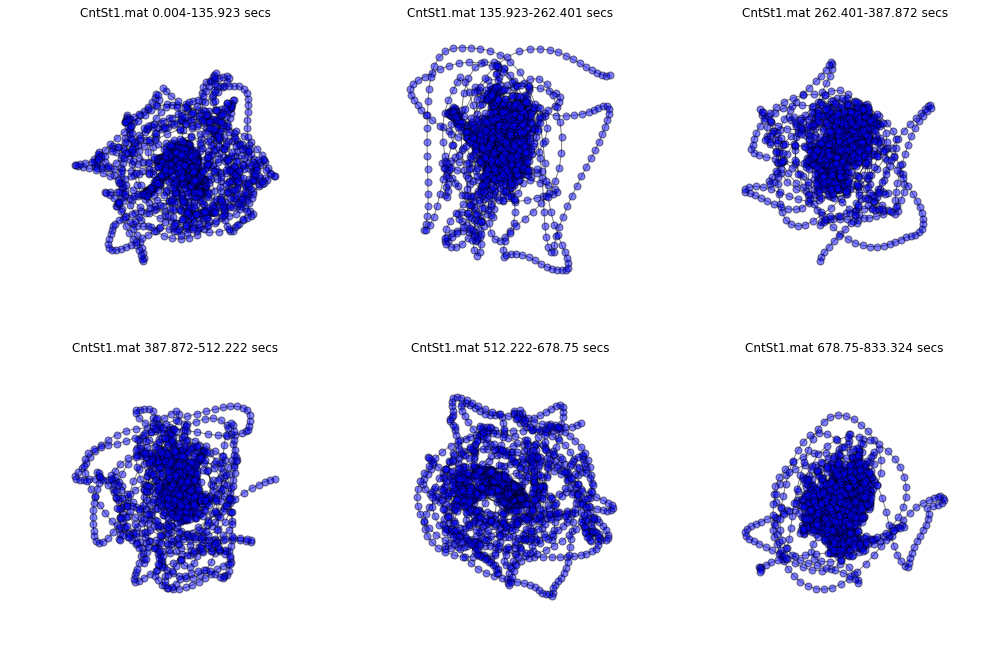

In [7]:
nodeSize=50
nodeColor1='blue'; nodeColor2='yellow'
#
f=gr.figure(figsize=(17,11))
ax=list(); 
if nSeg>3:
    rows=2; cols=sc.ceil(nSeg/2); 
else:
    rows=1; cols=nSeg
gr.ioff();
for n in sc.arange(nSeg):
    a=n*nPtsSeg; 
    if n==nSeg-1:
        b=-1
    else:
        b=a+nPtsSeg
    ax.append(f.add_subplot(rows,cols,n+1))
    nx.draw(g[n],ax=ax[n],pos=nx.spring_layout(g[n]), node_size=nodeSize,node_color=nodeColor1,alpha=0.5)
    ax[n].set_title(fName+" %g-%g secs"%(pigas[a],pigas[b]) )
gr.ion(); gr.draw()

## Comparison between different spike trains recorded in control and lesioned animals 

In [8]:
ctrFiles=getFileList(dataDir, prefix="CntSt", suffix=".mat")
lesFiles=getFileList(dataDir, prefix="LesSt", suffix=".mat")

Found 8 files with the indicated string
['CntSt1.mat', 'CntSt2.mat', 'CntSt3.mat', 'CntSt4.mat', 'CntSt5.mat', 'CntSt6.mat', 'CntSt7.mat', 'CntSt8.mat']
Found 8 files with the indicated string
['LesSt1.mat', 'LesSt2.mat', 'LesSt3.mat', 'LesSt4.mat', 'LesSt5.mat', 'LesSt6.mat', 'LesSt7.mat', 'LesSt8.mat']


Now perform the same analysis as above for each of the trains, and compare the graphs from a given segment. b Before doing so, let us create a function that prepares the data and another function that calculates visibility graphs from a list of time series.

In [33]:
def preprocessTrainsFromMatFiles(fileNameList):
    """
    preprocessTrainsFromFiles extracts spike trains from a list of .mat files containing spike times, one train of time-stamps per file.
    The spike trains are preprocessed by calculating interspike intervals and instantaneous firing rates. 
    The output is a dictionary containing the preprocessed data. 
    Example of use:
    ctrFiles=getFileList(dataDir, prefix="CntSt", suffix=".mat")
    ctrData= preprocessTrainsFromMatFiles(ctrFiles)
    """
    dataDir='./trenesBursts/aleSpikeTimes/'
    spikes=list(); isis=list(); ifrs=list()
    n=0
    for f in fileNameList:
        ff=dataDir + f
        s=sc.squeeze(io.loadmat(ff)["savevar"][0][0])
        spikes.append(s)
        print("Found %d spikes in %s"%(len(s),ff))
        isi = sc.zeros(len(s)); ifr = sc.zeros(len(s)) #Note time stamps are in milliseconds
        isi[1:]= s[1:]-s[:-1]
        ifr[1:]= 1/isi[1:]
        isis.append(isi); ifrs.append(ifr)
        n=n+1
    return {"spikeTrains":spikes, "ISIs":isis, "IFRs":ifrs}

Use the script to pre-process the data and obtain lists that can be used to produce several visibility graphs

In [76]:
print("Control")
ctrData= preprocessTrainsFromMatFiles(ctrFiles)
print("Lesioned")
lesData= preprocessTrainsFromMatFiles(lesFiles)

Control
Found 11820 spikes in ./trenesBursts/aleSpikeTimes/CntSt1.mat
Found 3659 spikes in ./trenesBursts/aleSpikeTimes/CntSt2.mat
Found 4044 spikes in ./trenesBursts/aleSpikeTimes/CntSt3.mat
Found 419 spikes in ./trenesBursts/aleSpikeTimes/CntSt4.mat
Found 322 spikes in ./trenesBursts/aleSpikeTimes/CntSt5.mat
Found 260 spikes in ./trenesBursts/aleSpikeTimes/CntSt6.mat
Found 356 spikes in ./trenesBursts/aleSpikeTimes/CntSt7.mat
Found 233 spikes in ./trenesBursts/aleSpikeTimes/CntSt8.mat
Lesioned
Found 127 spikes in ./trenesBursts/aleSpikeTimes/LesSt1.mat
Found 539 spikes in ./trenesBursts/aleSpikeTimes/LesSt2.mat
Found 304 spikes in ./trenesBursts/aleSpikeTimes/LesSt3.mat
Found 628 spikes in ./trenesBursts/aleSpikeTimes/LesSt4.mat
Found 276 spikes in ./trenesBursts/aleSpikeTimes/LesSt5.mat
Found 517 spikes in ./trenesBursts/aleSpikeTimes/LesSt6.mat
Found 285 spikes in ./trenesBursts/aleSpikeTimes/LesSt7.mat
Found 96 spikes in ./trenesBursts/aleSpikeTimes/LesSt8.mat


Create a function that calculates visibility graphs from the spike trains in a list as pre-processed by the function _preprocessTrainsFromMatFiles_.

In [62]:
def visibilityFromSpikeTrains(trains, ifrs, a=0, b=-1):
    """
    createVisibilityGraphs takes two lists with spike trains and their instantaneous firing rates and calculates visibility graphs
    """
    # Note the length of xList must be equal to the length of yList
    g=list()
    nSeries= len(trains)
    for n in sc.arange(nSeries):
        g.append(visibilityGraph(trains[n][a:b],ifrs[n][a:b]))
    return g

Also, create a function that plots the graphs form a list into a set of axes (also specified from a list). 

In [63]:
def showGraphList(gList, gLabels, layout="spring", nodeSize=50, nodeColor1='blue',transp=0.5):
    nAx = len(gList)
    f=gr.figure(figsize=(17,11))
    rows=2; cols= sc.ceil(nAx/rows)
    ax=list(); gr.ioff();
    for n in sc.arange(nAx):
        ax.append(f.add_subplot(rows,cols,n+1))
        if layout=="spring":
            nx.draw(gList[n],ax=ax[n],pos=nx.spring_layout(gList[n]), node_size=nodeSize,node_color=nodeColor1,alpha=transp)
        ax[n].set_title(gLabels[n])
    gr.ion(); gr.draw()
    return f

Now get the visibility graphs from the spike trains using the first $n$ points in the record.

In [73]:
nPts=5000
gCtr=visibilityFromSpikeTrains(ctrData["spikeTrains"], ctrData["IFRs"],a=0, b=nPts)
gLes=visibilityFromSpikeTrains(lesData["spikeTrains"], lesData["IFRs"],a=0, b=nPts)

Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data
Done calculating the visibility between nodes.
Created a graph with the data

The visibility graphs from the spike trains recorded from control animals are

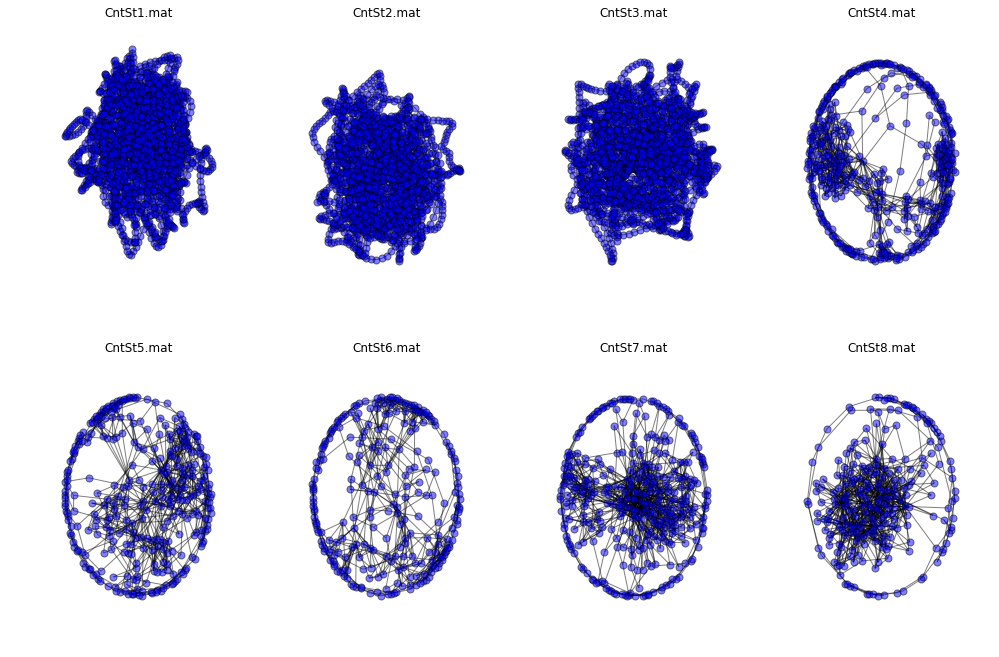

In [74]:
fCtr=showGraphList(gCtr, ctrFiles)

The visibility graphs from the spike trains recorded from lesioned animals are

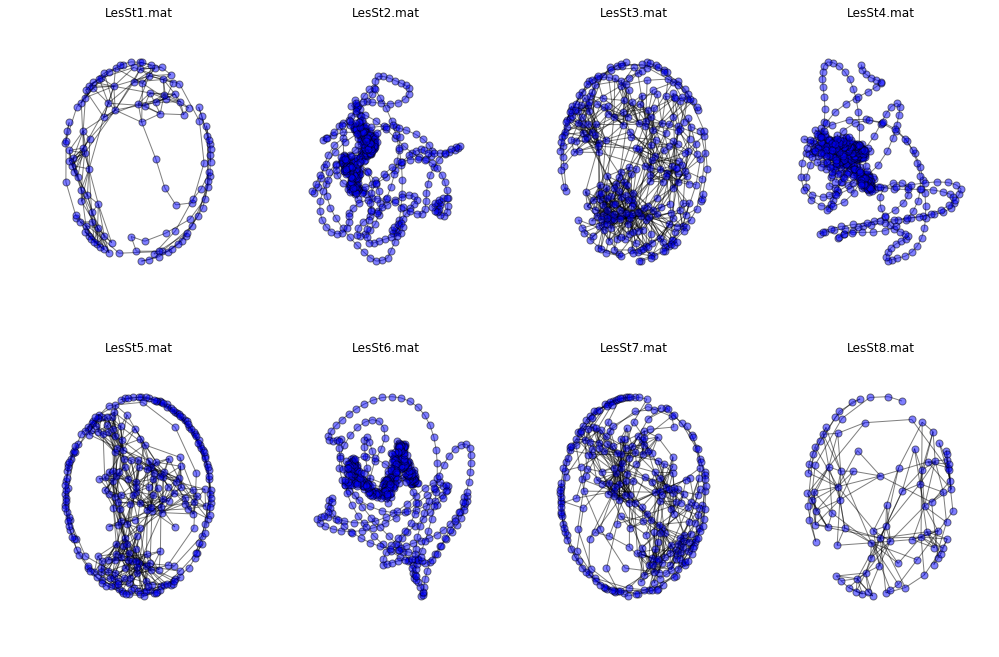

In [75]:
fLes=showGraphList(gLes, lesFiles)

### Analysis of the topological properties of the graphs